In [21]:
import os
import json
import glob
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8")  # estilo agradable

In [22]:
broken = []
for path in glob.glob("resultados_ml_v2/*.json"):
    try:
        with open(path, "r") as f:
            txt = f.read().strip()

        if txt == "":
            print("❌ ARCHIVO VACÍO:", path)
            broken.append(path)
            continue

        try:
            json.loads(txt)
        except json.JSONDecodeError as e:
            print("❌ JSON MALFORMADO:", path)
            print("Contenido:")
            print(repr(txt[:300]))   # imprime los primeros 300 chars
            broken.append(path)

    except Exception as e:
        print(f"❌ ERROR LEYENDO {path}:", e)
        broken.append(path)

print("\nResumen => Archivos problemáticos:", len(broken))


Resumen => Archivos problemáticos: 0


In [23]:
def load_ml_results(results_dir="resultados_ml_v2"):
    rows = []
    for file in glob.glob(os.path.join(results_dir, "*.json")):
        with open(file, "r") as f:
            data = json.load(f)
        
        if data.get("status") != "OK":
            continue
        
        rows.append({
            "group_id": data.get("group_id"),
            "best_score": data.get("best_score"),
            "W": data.get("W"),
            "mu": data.get("mu"),
            "w": data.get("w"),
            "eta": data.get("eta"),
            "Bmin": data.get("Bmin"),
            "B2": data.get("B2"),
            "alpha": data.get("alpha"),
            "beta": data.get("beta"),
            "Btime": data.get("Btime"),
            "Bmemory": data.get("Bmemory"),
            "Cbase": data.get("Cbase"),
            "Cblock": data.get("Cblock"),
            "Coracle": data.get("Coracle"),
        })

    return pd.DataFrame(rows)


In [24]:
data_list = load_ml_results("resultados_ml_v2")
data_list


,group_id,best_score,W,mu,w,eta,Bmin,B2,alpha,beta,Btime,Bmemory,Cbase,Cblock,Coracle
0,W128_mu16_w16_eta2_a1_b10_Bt30_Bm30_Cb5_Cbl4_Co6,0.019008,128,16,16,2,74968,259095,0.001,0.10,1073741824,1073741824,32,16,64
1,W128_mu16_w16_eta2_a1_b10_Bt30_Bm50_Cb5_Cbl4_Co6,0.019008,128,16,16,2,74968,259095,0.001,0.10,1073741824,1125899906842624,32,16,64
2,W128_mu16_w16_eta2_a1_b15_Bt30_Bm30_Cb5_Cbl4_Co6,0.009804,128,16,16,2,113866,265555,0.001,0.15,1073741824,1073741824,32,16,64
3,W128_mu16_w16_eta2_a1_b15_Bt30_Bm50_Cb5_Cbl4_Co6,0.009804,128,16,16,2,113866,265555,0.001,0.15,1073741824,1125899906842624,32,16,64
4,W128_mu16_w16_eta2_a1_b20_Bt30_Bm30_Cb5_Cbl4_Co6,0.009856,128,16,16,2,153841,282514,0.001,0.20,1073741824,1073741824,32,16,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3566,W256_mu8_w8_eta8_a1_b3_Bt50_Bm50_Cb5_Cbl4_Co6,0.023089,256,8,8,8,39763,314855,0.001,0.03,1125899906842624,1125899906842624,32,16,64
3567,W256_mu8_w8_eta8_a1_b5_Bt30_Bm30_Cb5_Cbl4_Co6,0.013630,256,8,8,8,64814,313064,0.001,0.05,1073741824,1073741824,32,16,64
3568,W256_mu8_w8_eta8_a1_b5_Bt30_Bm50_Cb5_Cbl4_Co6,0.013630,256,8,8,8,64814,313064,0.001,0.05,1073741824,1125899906842624,32,16,64
3569,W256_mu8_w8_eta8_a1_b5_Bt50_Bm30_Cb5_Cbl4_Co6,0.013630,256,8,8,8,64814,313064,0.001,0.05,1125899906842624,1073741824,32,16,64


In [25]:
# lista literal de rutas problemáticas (puedes copiar/pegar del print)
bad_files = [
    r"resultados_ml_v2\W128_mu32_w16_eta2_a1_b15_Bt50_Bm30_Cb5_Cbl4_Co6.json",
    r"resultados_ml_v2\W128_mu32_w16_eta2_a1_b20_Bt50_Bm30_Cb5_Cbl4_Co6.json",
    r"resultados_ml_v2\W128_mu32_w16_eta2_a1_b25_Bt50_Bm30_Cb5_Cbl4_Co6.json",
    r"resultados_ml_v2\W128_mu64_w16_eta2_a1_b3_Bt50_Bm30_Cb5_Cbl4_Co6.json",
    r"resultados_ml_v2\W192_mu4_w16_eta4_a1_b15_Bt30_Bm30_Cb5_Cbl4_Co6.json",
    r"resultados_ml_v2\W192_mu4_w16_eta4_a1_b20_Bt30_Bm30_Cb5_Cbl4_Co6.json",
    r"resultados_ml_v2\W192_mu4_w16_eta4_a1_b25_Bt30_Bm30_Cb5_Cbl4_Co6.json",
    r"resultados_ml_v2\W192_mu8_w16_eta4_a1_b3_Bt30_Bm30_Cb5_Cbl4_Co6.json",
]

import os

for path in bad_files:
    if os.path.exists(path):
        os.remove(path)
        print("🗑️ Borrado:", path)
    else:
        print("No existe:", path)


No existe: resultados_ml_v2\W128_mu32_w16_eta2_a1_b15_Bt50_Bm30_Cb5_Cbl4_Co6.json
No existe: resultados_ml_v2\W128_mu32_w16_eta2_a1_b20_Bt50_Bm30_Cb5_Cbl4_Co6.json
No existe: resultados_ml_v2\W128_mu32_w16_eta2_a1_b25_Bt50_Bm30_Cb5_Cbl4_Co6.json
No existe: resultados_ml_v2\W128_mu64_w16_eta2_a1_b3_Bt50_Bm30_Cb5_Cbl4_Co6.json
No existe: resultados_ml_v2\W192_mu4_w16_eta4_a1_b15_Bt30_Bm30_Cb5_Cbl4_Co6.json
No existe: resultados_ml_v2\W192_mu4_w16_eta4_a1_b20_Bt30_Bm30_Cb5_Cbl4_Co6.json
No existe: resultados_ml_v2\W192_mu4_w16_eta4_a1_b25_Bt30_Bm30_Cb5_Cbl4_Co6.json
No existe: resultados_ml_v2\W192_mu8_w16_eta4_a1_b3_Bt30_Bm30_Cb5_Cbl4_Co6.json


In [26]:
import math

def to_pow2_label(x):
    """
    Convierte x a la forma '2^k' si es potencia de dos.
    Si no lo es (no debería ocurrir en tu caso), retorna el número normal.
    """
    if x == 0:
        return "0"
    k = math.log2(x)
    if k.is_integer():
        return f"2^{int(k)}"
    return str(x)


In [27]:
df_groupBC = data_list.copy()

df_groupBC["group_BC"] = (
    "Bt" + df_groupBC["Btime"].astype(str) +
    "_Bm" + df_groupBC["Bmemory"].astype(str) +
    "_Cb" + df_groupBC["Cbase"].astype(str) +
    "_Cbl" + df_groupBC["Cblock"].astype(str) +
    "_Co" + df_groupBC["Coracle"].astype(str)
)

df_groupBC.head()


,group_id,best_score,W,mu,w,eta,Bmin,B2,alpha,beta,Btime,Bmemory,Cbase,Cblock,Coracle,group_BC
0,W128_mu16_w16_eta2_a1_b10_Bt30_Bm30_Cb5_Cbl4_Co6,0.019008,128,16,16,2,74968,259095,0.001,0.10,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64
1,W128_mu16_w16_eta2_a1_b10_Bt30_Bm50_Cb5_Cbl4_Co6,0.019008,128,16,16,2,74968,259095,0.001,0.10,1073741824,1125899906842624,32,16,64,Bt1073741824_Bm1125899906842624_Cb32_Cbl16_Co64
2,W128_mu16_w16_eta2_a1_b15_Bt30_Bm30_Cb5_Cbl4_Co6,0.009804,128,16,16,2,113866,265555,0.001,0.15,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64
3,W128_mu16_w16_eta2_a1_b15_Bt30_Bm50_Cb5_Cbl4_Co6,0.009804,128,16,16,2,113866,265555,0.001,0.15,1073741824,1125899906842624,32,16,64,Bt1073741824_Bm1125899906842624_Cb32_Cbl16_Co64
4,W128_mu16_w16_eta2_a1_b20_Bt30_Bm30_Cb5_Cbl4_Co6,0.009856,128,16,16,2,153841,282514,0.001,0.20,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64


In [ ]:
df_groupBC["group_BC_pretty"] = (
    "W="  + df_groupBC["W"].apply(to_pow2_label) +
    "Bt="  + df_groupBC["Btime"].apply(to_pow2_label) +
    ", Bm=" + df_groupBC["Bmemory"].apply(to_pow2_label) +
    ", Cb=" + df_groupBC["Cbase"].apply(to_pow2_label) +
    ", Cbl=" + df_groupBC["Cblock"].apply(to_pow2_label) +
    ", Co="  + df_groupBC["Coracle"].apply(to_pow2_label)
)

<Figure size 800x500 with 0 Axes>

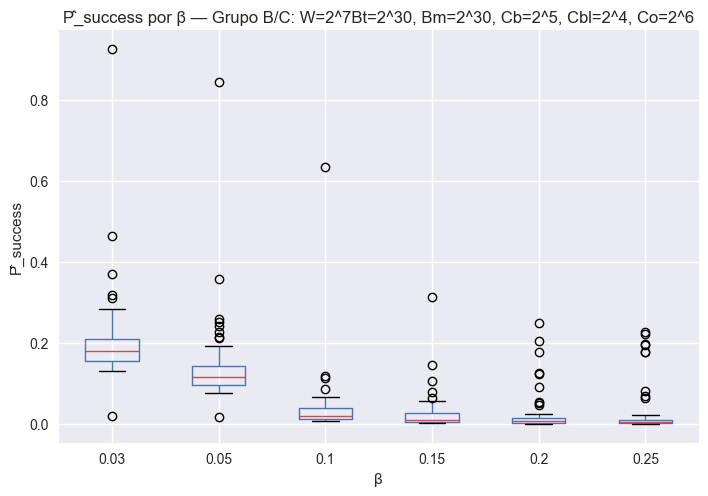

<Figure size 800x500 with 0 Axes>

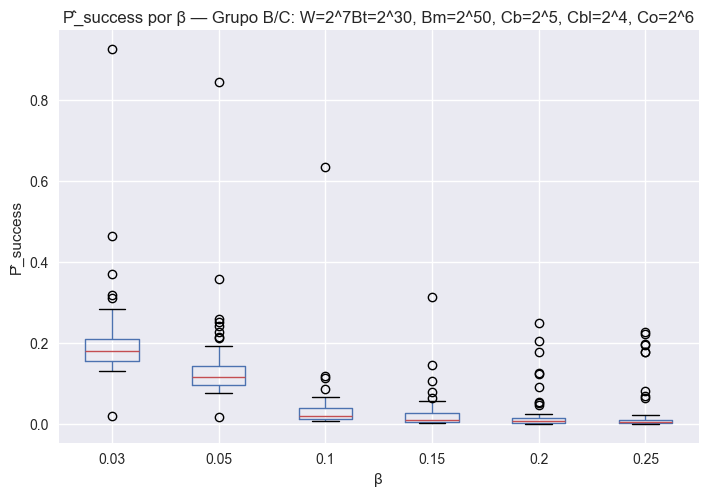

<Figure size 800x500 with 0 Axes>

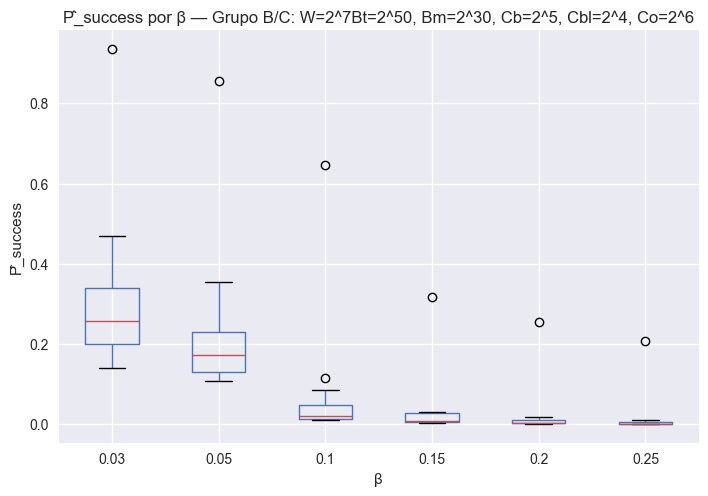

<Figure size 800x500 with 0 Axes>

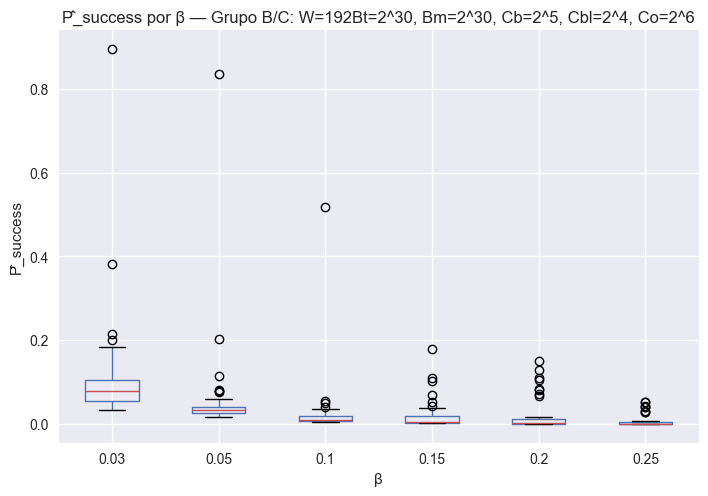

<Figure size 800x500 with 0 Axes>

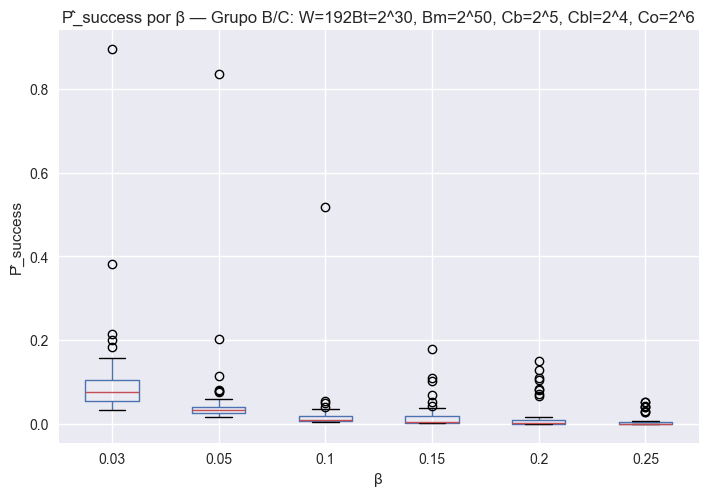

<Figure size 800x500 with 0 Axes>

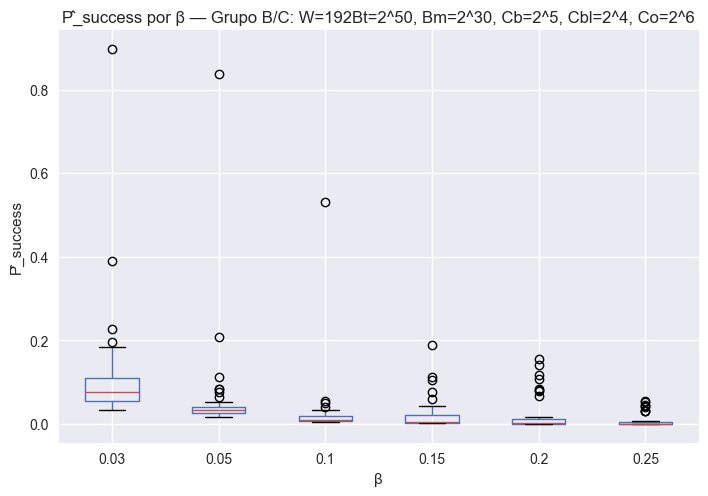

<Figure size 800x500 with 0 Axes>

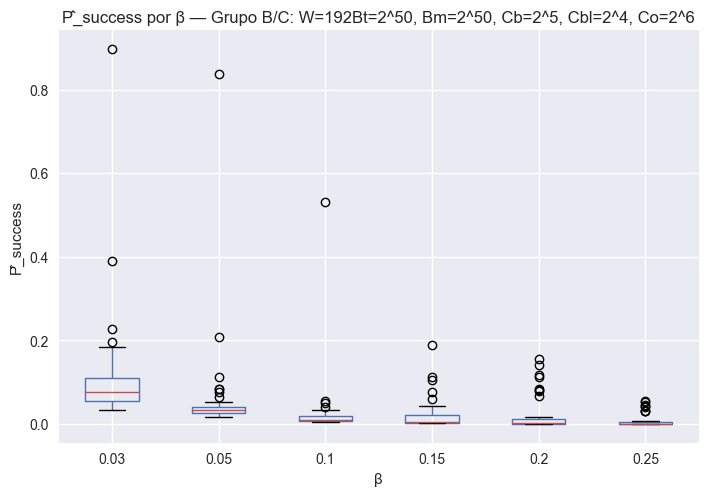

<Figure size 800x500 with 0 Axes>

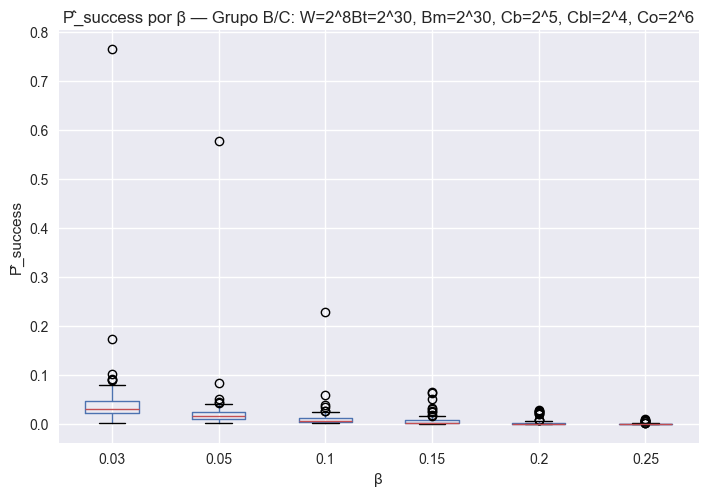

<Figure size 800x500 with 0 Axes>

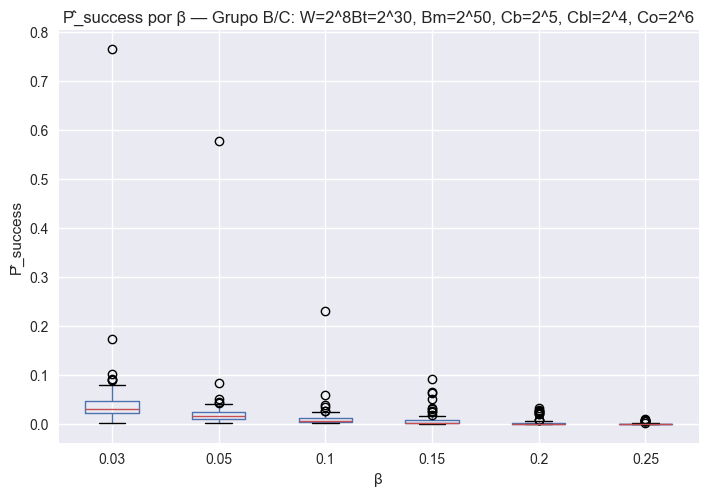

<Figure size 800x500 with 0 Axes>

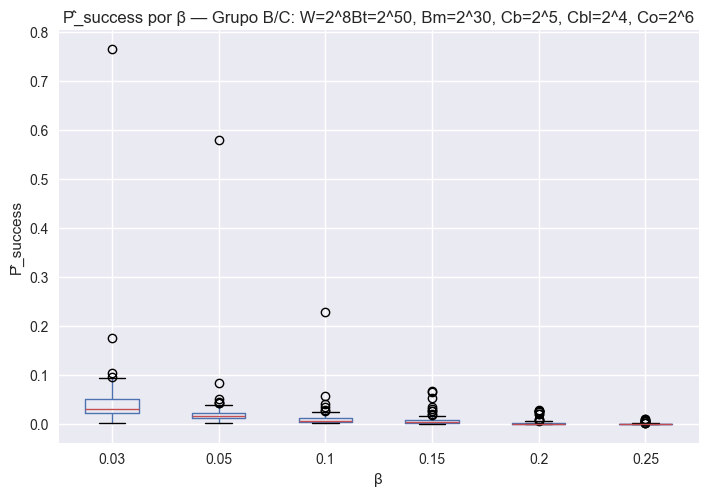

<Figure size 800x500 with 0 Axes>

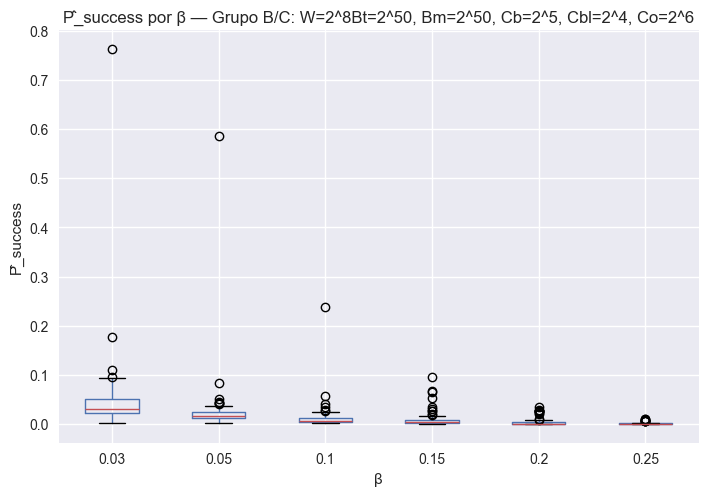

In [ ]:
groups = df_groupBC["group_BC_pretty"].unique()

for group in groups:
    sub = df_groupBC[df_groupBC["group_BC_pretty"] == group]
    
    plt.figure(figsize=(8,5))
    sub.boxplot(
        column="best_score",
        by="beta",
        grid=True
    )
    plt.title(f"P̂_success por β — Grupo B/C: {group}")
    plt.suptitle("")   # elimina el título extra
    plt.xlabel("β")
    plt.ylabel("P̂_success")
    plt.show()


In [42]:
import os
import matplotlib.pyplot as plt

def plot_boxplots_by_group(
    df_groupBC,
    show_line=True,
    show_values=True,
    show_config=True,
    save_fig=False,
    outdir="figuras"
):
    """
    Genera boxplots de best_score vs beta por group_BC_pretty.
    Parámetros:
      - show_line: dibuja la línea que une los máximos por β.
      - show_values: anota el valor máximo sobre cada punto.
      - show_config: anota (mu,w,eta) y devuelve un DataFrame con los ganadores.
      - save_fig: guarda las figuras en 'outdir'.
    Retorna:
      - winners_all: DataFrame con la configuración ganadora por (grupo, beta)
                     si show_config=True, en caso contrario None.
    """
    if save_fig:
        os.makedirs(outdir, exist_ok=True)

    groups = df_groupBC["group_BC_pretty"].unique()
    winners_all = []  # para acumular las configs ganadoras

    for group in groups:
        sub = df_groupBC[df_groupBC["group_BC_pretty"] == group]

        plt.figure(figsize=(10, 6))
        ax = sub.boxplot(column="best_score", by="beta", grid=True)

        betas = sorted(sub["beta"].unique())
        x_pos = range(1, len(betas) + 1)
        max_vals = [sub[sub["beta"] == b]["best_score"].max() for b in betas]

        # --- calcular fila ganadora por beta (solo si hace falta) ---
        if show_line or show_values or show_config:
            idx = sub.groupby("beta")["best_score"].idxmax()
            winners = sub.loc[idx].copy()
            winners["group_BC_pretty"] = group  # para identificar luego

            if show_config:
                winners_all.append(winners)

        # --- línea que une los máximos ---
        if show_line:
            plt.plot(
                x_pos,
                max_vals,
                marker="o",
                color="red",
                linewidth=2,
                label="Máximo por β"
            )

        # --- anotaciones ---
        if show_line or show_values or show_config:
            for x, b, y in zip(x_pos, betas, max_vals):
                row = winners[winners["beta"] == b].iloc[0]

                # valor numérico
                if show_values:
                    plt.annotate(
                        f"{y:.3f}",
                        xy=(x, y),
                        xytext=(0, 8),
                        textcoords="offset points",
                        ha="center",
                        fontsize=9,
                        color="darkred",
                        fontweight="bold"
                    )

                # configuración (mu, w, eta)
                if show_config:
                    cfg = f"(μ={row['mu']}, w={row['w']}, η={row['eta']})"
                    plt.annotate(
                        cfg,
                        xy=(x, y),
                        xytext=(0, -18),
                        textcoords="offset points",
                        ha="center",
                        fontsize=8,
                        color="blue"
                    )

        plt.title(f"P̂_success por β — Grupo B/C: {group}")
        plt.suptitle("")
        plt.xlabel("β")
        plt.ylabel("P̂_success")
        if show_line:
            plt.legend()
        plt.tight_layout()

        # guardar figura
        if save_fig:
            fname = group.replace(" ", "_").replace("=", "").replace(",", "").replace("^", "pow")
            fname = os.path.join(outdir, f"Psuccess_vs_beta_{fname}.png")
            plt.savefig(fname, dpi=300, bbox_inches="tight")
            print(f"✔️ Guardada: {fname}")

        plt.close()

    if show_config and winners_all:
        winners_all = (
            pd.concat(winners_all, ignore_index=True)
            .sort_values(["group_BC_pretty", "beta"])
            .reset_index(drop=True)
        )
        return winners_all
    else:
        return None

In [43]:
winners = plot_boxplots_by_group(
    df_groupBC,
    show_line=True,
    show_values=True,
    show_config=True,
    save_fig=True,
    outdir="figuras"
)

winners.head()   # tabla con la config que da la prob. máxima por (grupo, beta)

✔️ Guardada: figuras\Psuccess_vs_beta_W2pow7Bt2pow30_Bm2pow30_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W2pow7Bt2pow30_Bm2pow50_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W2pow7Bt2pow50_Bm2pow30_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W192Bt2pow30_Bm2pow30_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W192Bt2pow30_Bm2pow50_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W192Bt2pow50_Bm2pow30_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W192Bt2pow50_Bm2pow50_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W2pow8Bt2pow30_Bm2pow30_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W2pow8Bt2pow30_Bm2pow50_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W2pow8Bt2pow50_Bm2pow30_Cb2pow5_Cbl2pow4_Co2pow6.png
✔️ Guardada: figuras\Psuccess_vs_beta_W2pow8Bt2pow50_Bm2pow50_Cb2pow5_Cbl2pow4_Co2pow6.png


,group_id,best_score,W,mu,w,eta,Bmin,B2,alpha,beta,Btime,Bmemory,Cbase,Cblock,Coracle,group_BC,group_BC_pretty
0,W192_mu64_w4_eta2_a1_b3_Bt30_Bm30_Cb5_Cbl4_Co6,0.894952,192,64,4,2,31395,136560,0.001,0.03,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
1,W192_mu64_w4_eta2_a1_b5_Bt30_Bm30_Cb5_Cbl4_Co6,0.834926,192,64,4,2,51238,141080,0.001,0.05,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
2,W192_mu64_w4_eta2_a1_b10_Bt30_Bm30_Cb5_Cbl4_Co6,0.518238,192,64,4,2,106790,175837,0.001,0.10,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
3,W192_mu64_w4_eta2_a1_b15_Bt30_Bm30_Cb5_Cbl4_Co6,0.179412,192,64,4,2,161784,218667,0.001,0.15,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
4,W192_mu64_w8_eta2_a1_b20_Bt30_Bm30_Cb5_Cbl4_Co6,0.151016,192,64,8,2,219884,284221,0.001,0.20,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [30]:
cols = [
    "best_score",
    "beta",
    "mu",
    "w",
    "eta",
    "Bmin",
    "B2",
    "Btime",
    "Bmemory",
    "Cbase",
    "Cblock",
    "Coracle",
    "group_BC_pretty"   # si ya generaste etiquetas bonitas
]

table_best = df_groupBC[cols].sort_values("best_score", ascending=False)
table_best.head(20)


,best_score,beta,mu,w,eta,Bmin,B2,Btime,Bmemory,Cbase,Cblock,Coracle,group_BC_pretty
596,0.935399,0.03,64,4,2,21597,369474,1125899906842624,1073741824,32,16,64,"W=2^7Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
594,0.925096,0.03,64,4,2,21597,160480,1073741824,1073741824,32,16,64,"W=2^7Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
595,0.925096,0.03,64,4,2,21597,160480,1073741824,1125899906842624,32,16,64,"W=2^7Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
1687,0.897138,0.03,64,4,2,31395,310500,1125899906842624,1125899906842624,32,16,64,"W=192Bt=2^50, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
1686,0.897138,0.03,64,4,2,31395,310500,1125899906842624,1073741824,32,16,64,"W=192Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
1685,0.894952,0.03,64,4,2,31395,136560,1073741824,1125899906842624,32,16,64,"W=192Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
1684,0.894952,0.03,64,4,2,31395,136560,1073741824,1073741824,32,16,64,"W=192Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
599,0.855411,0.05,64,4,2,36229,305757,1125899906842624,1073741824,32,16,64,"W=2^7Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
598,0.844445,0.05,64,4,2,36229,156017,1073741824,1125899906842624,32,16,64,"W=2^7Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
597,0.844445,0.05,64,4,2,36229,156017,1073741824,1073741824,32,16,64,"W=2^7Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"


In [31]:
best_config_per_group = (
    df_groupBC
    .sort_values("best_score", ascending=False)   # ordenar descendente
    .groupby("group_BC_pretty")                   # agrupar por grupo
    .head(1)                                      # tomar el mejor de cada grupo
    .reset_index(drop=True)
)

best_config_per_group

,group_id,best_score,W,mu,w,eta,Bmin,B2,alpha,beta,Btime,Bmemory,Cbase,Cblock,Coracle,group_BC,group_BC_pretty
0,W128_mu64_w4_eta2_a1_b3_Bt50_Bm30_Cb5_Cbl4_Co6,0.935399,128,64,4,2,21597,369474,0.001,0.03,1125899906842624,1073741824,32,16,64,Bt1125899906842624_Bm1073741824_Cb32_Cbl16_Co64,"W=2^7Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
1,W128_mu64_w4_eta2_a1_b3_Bt30_Bm30_Cb5_Cbl4_Co6,0.925096,128,64,4,2,21597,160480,0.001,0.03,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=2^7Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
2,W128_mu64_w4_eta2_a1_b3_Bt30_Bm50_Cb5_Cbl4_Co6,0.925096,128,64,4,2,21597,160480,0.001,0.03,1073741824,1125899906842624,32,16,64,Bt1073741824_Bm1125899906842624_Cb32_Cbl16_Co64,"W=2^7Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
3,W192_mu64_w4_eta2_a1_b3_Bt50_Bm50_Cb5_Cbl4_Co6,0.897138,192,64,4,2,31395,310500,0.001,0.03,1125899906842624,1125899906842624,32,16,64,Bt1125899906842624_Bm1125899906842624_Cb32_Cbl...,"W=192Bt=2^50, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
4,W192_mu64_w4_eta2_a1_b3_Bt50_Bm30_Cb5_Cbl4_Co6,0.897138,192,64,4,2,31395,310500,0.001,0.03,1125899906842624,1073741824,32,16,64,Bt1125899906842624_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
5,W192_mu64_w4_eta2_a1_b3_Bt30_Bm50_Cb5_Cbl4_Co6,0.894952,192,64,4,2,31395,136560,0.001,0.03,1073741824,1125899906842624,32,16,64,Bt1073741824_Bm1125899906842624_Cb32_Cbl16_Co64,"W=192Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
6,W192_mu64_w4_eta2_a1_b3_Bt30_Bm30_Cb5_Cbl4_Co6,0.894952,192,64,4,2,31395,136560,0.001,0.03,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
7,W256_mu64_w4_eta2_a1_b3_Bt30_Bm50_Cb5_Cbl4_Co6,0.765295,256,64,4,2,39767,144932,0.001,0.03,1073741824,1125899906842624,32,16,64,Bt1073741824_Bm1125899906842624_Cb32_Cbl16_Co64,"W=2^8Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
8,W256_mu64_w4_eta2_a1_b3_Bt30_Bm30_Cb5_Cbl4_Co6,0.765295,256,64,4,2,39767,144932,0.001,0.03,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=2^8Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
9,W256_mu64_w4_eta2_a1_b3_Bt50_Bm30_Cb5_Cbl4_Co6,0.764645,256,64,4,2,39767,174752,0.001,0.03,1125899906842624,1073741824,32,16,64,Bt1125899906842624_Bm1073741824_Cb32_Cbl16_Co64,"W=2^8Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"


In [32]:
best_config_group_beta = (
    df_groupBC
    .sort_values("best_score", ascending=False)   # ordenar por score
    .groupby(["group_BC_pretty", "beta"])         # agrupar por grupo y beta
    .head(1)                                      # tomar la mejor fila
    .reset_index(drop=True)
)

best_config_group_beta


,group_id,best_score,W,mu,w,eta,Bmin,B2,alpha,beta,Btime,Bmemory,Cbase,Cblock,Coracle,group_BC,group_BC_pretty
0,W128_mu64_w4_eta2_a1_b3_Bt50_Bm30_Cb5_Cbl4_Co6,0.935399,128,64,4,2,21597,369474,0.001,0.03,1125899906842624,1073741824,32,16,64,Bt1125899906842624_Bm1073741824_Cb32_Cbl16_Co64,"W=2^7Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
1,W128_mu64_w4_eta2_a1_b3_Bt30_Bm30_Cb5_Cbl4_Co6,0.925096,128,64,4,2,21597,160480,0.001,0.03,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=2^7Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
2,W128_mu64_w4_eta2_a1_b3_Bt30_Bm50_Cb5_Cbl4_Co6,0.925096,128,64,4,2,21597,160480,0.001,0.03,1073741824,1125899906842624,32,16,64,Bt1073741824_Bm1125899906842624_Cb32_Cbl16_Co64,"W=2^7Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
3,W192_mu64_w4_eta2_a1_b3_Bt50_Bm50_Cb5_Cbl4_Co6,0.897138,192,64,4,2,31395,310500,0.001,0.03,1125899906842624,1125899906842624,32,16,64,Bt1125899906842624_Bm1125899906842624_Cb32_Cbl...,"W=192Bt=2^50, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
4,W192_mu64_w4_eta2_a1_b3_Bt50_Bm30_Cb5_Cbl4_Co6,0.897138,192,64,4,2,31395,310500,0.001,0.03,1125899906842624,1073741824,32,16,64,Bt1125899906842624_Bm1073741824_Cb32_Cbl16_Co64,"W=192Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,W256_mu64_w8_eta2_a1_b20_Bt30_Bm30_Cb5_Cbl4_Co6,0.028763,256,64,8,2,278680,326935,0.001,0.20,1073741824,1073741824,32,16,64,Bt1073741824_Bm1073741824_Cb32_Cbl16_Co64,"W=2^8Bt=2^30, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
62,W256_mu64_w16_eta4_a1_b25_Bt50_Bm30_Cb5_Cbl4_Co6,0.009427,256,64,16,4,360849,499378,0.001,0.25,1125899906842624,1073741824,32,16,64,Bt1125899906842624_Bm1073741824_Cb32_Cbl16_Co64,"W=2^8Bt=2^50, Bm=2^30, Cb=2^5, Cbl=2^4, Co=2^6"
63,W256_mu64_w16_eta4_a1_b25_Bt50_Bm50_Cb5_Cbl4_Co6,0.009427,256,64,16,4,360849,499378,0.001,0.25,1125899906842624,1125899906842624,32,16,64,Bt1125899906842624_Bm1125899906842624_Cb32_Cbl...,"W=2^8Bt=2^50, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"
64,W256_mu64_w16_eta4_a1_b25_Bt30_Bm50_Cb5_Cbl4_Co6,0.009311,256,64,16,4,360849,430113,0.001,0.25,1073741824,1125899906842624,32,16,64,Bt1073741824_Bm1125899906842624_Cb32_Cbl16_Co64,"W=2^8Bt=2^30, Bm=2^50, Cb=2^5, Cbl=2^4, Co=2^6"


In [33]:
resumen = {
    "Canal": {
        "alpha (fijo)": [0.001],
        "beta (explorado)": sorted(df_groupBC["beta"].unique()),
    },
    "OKEAlib (explorado)": {
        "mu": sorted(df_groupBC["mu"].unique()),
        "w": sorted(df_groupBC["w"].unique()),
        "eta": sorted(df_groupBC["eta"].unique()),
    },
    "Semilla": {
        "W": sorted(df_groupBC["W"].unique()),
    },
    "Presupuestos B (fijos)": {
        "Btime": sorted(df_groupBC["Btime"].unique()),
        "Bmemory": sorted(df_groupBC["Bmemory"].unique()),
    },
    "Costos C (fijos)": {
        "Cbase": sorted(df_groupBC["Cbase"].unique()),
        "Cblock": sorted(df_groupBC["Cblock"].unique()),
        "Coracle": sorted(df_groupBC["Coracle"].unique()),
    },
}

resumen


{'Canal': {'alpha (fijo)': [0.001],
  'beta (explorado)': [np.float64(0.03),
   np.float64(0.05),
   np.float64(0.1),
   np.float64(0.15),
   np.float64(0.2),
   np.float64(0.25)]},
 'OKEAlib (explorado)': {'mu': [np.int64(2),
   np.int64(4),
   np.int64(8),
   np.int64(16),
   np.int64(32),
   np.int64(64)],
  'w': [np.int64(4), np.int64(8), np.int64(16)],
  'eta': [np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32)]},
 'Semilla': {'W': [np.int64(128), np.int64(192), np.int64(256)]},
 'Presupuestos B (fijos)': {'Btime': [np.int64(1073741824),
   np.int64(1125899906842624)],
  'Bmemory': [np.int64(1073741824), np.int64(1125899906842624)]},
 'Costos C (fijos)': {'Cbase': [np.int64(32)],
  'Cblock': [np.int64(16)],
  'Coracle': [np.int64(64)]}}

In [34]:
import math

def fmt_pow2(x):
    """Devuelve '2^k' si x es potencia de 2. Si no, devuelve el número."""
    if x <= 0:
        return str(x)
    k = math.log2(x)
    return f"2^{int(k)}" if k.is_integer() else str(x)


In [35]:
def resumen_parametros(df):

    resumen = {}

    # CANAL
    resumen["Canal"] = {
        "alpha (fijo)": sorted(df["alpha"].unique()),
        "beta (explorado)": sorted(df["beta"].unique()),
    }

    # OKEA
    resumen["OKEAlib (explorado)"] = {
        "mu": sorted(df["mu"].unique()),
        "w": sorted(df["w"].unique()),
        "eta": sorted(df["eta"].unique()),
        "W": sorted(df["W"].unique()),
    }

    # PRESUPUESTOS B
    resumen["Presupuestos B (fijos)"] = {
        "Btime": [fmt_pow2(x) for x in sorted(df["Btime"].unique())],
        "Bmemory": [fmt_pow2(x) for x in sorted(df["Bmemory"].unique())],
        "Bmin (predicción ML)": "variable por experimento",
        "B2 (predicción ML)": "variable por experimento",
    }

    # COSTOS C
    resumen["Costos C (fijos)"] = {
        "Cbase": [fmt_pow2(x) for x in sorted(df["Cbase"].unique())],
        "Cblock": [fmt_pow2(x) for x in sorted(df["Cblock"].unique())],
        "Coracle": [fmt_pow2(x) for x in sorted(df["Coracle"].unique())],
    }

    return resumen

# Generar el resumen
resumen = resumen_parametros(df_groupBC)
resumen


{'Canal': {'alpha (fijo)': [np.float64(0.001)],
  'beta (explorado)': [np.float64(0.03),
   np.float64(0.05),
   np.float64(0.1),
   np.float64(0.15),
   np.float64(0.2),
   np.float64(0.25)]},
 'OKEAlib (explorado)': {'mu': [np.int64(2),
   np.int64(4),
   np.int64(8),
   np.int64(16),
   np.int64(32),
   np.int64(64)],
  'w': [np.int64(4), np.int64(8), np.int64(16)],
  'eta': [np.int64(2), np.int64(4), np.int64(8), np.int64(16), np.int64(32)],
  'W': [np.int64(128), np.int64(192), np.int64(256)]},
 'Presupuestos B (fijos)': {'Btime': ['2^30', '2^50'],
  'Bmemory': ['2^30', '2^50'],
  'Bmin (predicción ML)': 'variable por experimento',
  'B2 (predicción ML)': 'variable por experimento'},
 'Costos C (fijos)': {'Cbase': ['2^5'], 'Cblock': ['2^4'], 'Coracle': ['2^6']}}

In [36]:
from IPython.display import Markdown, display

def resumen_markdown(res):
    md = "# 📘 Resumen de parámetros explorados\n\n"

    for section, items in res.items():
        md += f"## 🔹 {section}\n\n"
        md += "| Parámetro | Valores |\n"
        md += "|-----------|---------|\n"
        for key, val in items.items():
            if isinstance(val, list):
                md += f"| **{key}** | `{', '.join(map(str, val))}` |\n"
            else:
                md += f"| **{key}** | {val} |\n"
        md += "\n---\n\n"
    display(Markdown(md))

# Mostrar resumen en formato bonito
resumen_markdown(resumen)


# 📘 Resumen de parámetros explorados

## 🔹 Canal

| Parámetro | Valores |
|-----------|---------|
| **alpha (fijo)** | `0.001` |
| **beta (explorado)** | `0.03, 0.05, 0.1, 0.15, 0.2, 0.25` |

---

## 🔹 OKEAlib (explorado)

| Parámetro | Valores |
|-----------|---------|
| **mu** | `2, 4, 8, 16, 32, 64` |
| **w** | `4, 8, 16` |
| **eta** | `2, 4, 8, 16, 32` |
| **W** | `128, 192, 256` |

---

## 🔹 Presupuestos B (fijos)

| Parámetro | Valores |
|-----------|---------|
| **Btime** | `2^30, 2^50` |
| **Bmemory** | `2^30, 2^50` |
| **Bmin (predicción ML)** | variable por experimento |
| **B2 (predicción ML)** | variable por experimento |

---

## 🔹 Costos C (fijos)

| Parámetro | Valores |
|-----------|---------|
| **Cbase** | `2^5` |
| **Cblock** | `2^4` |
| **Coracle** | `2^6` |

---



In [37]:
import os
import glob
import ast
import math

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
def load_montecarlo_results(results_dir="resultados_v6"):
    dfs = []
    pattern = os.path.join(results_dir, "*.csv")
    for path in glob.glob(pattern):
        df = pd.read_csv(path)
        df["source_file"] = os.path.basename(path)
        dfs.append(df)
    if not dfs:
        raise RuntimeError(f"No se encontraron CSV en {results_dir}")
    return pd.concat(dfs, ignore_index=True)

mc = load_montecarlo_results("resultados_v6")
mc


,W,mu,w,eta,alpha,beta,N,N_valid,excluded_seeds,exception_failures,...,edges_last,NE_bin_avg,C_bin_rate,NE_pref_avg,C_pref_rate,excluded_rate,exception_rate,valid_failure_rate,seed,source_file
0,128,16,16,2,0.001,0.10,100,1,99,0,...,"[62711, 85727, 108743, 131759, 154775, 177791,...","[0.0, 33.0, 802.0, 5996.0, 20001.0, 24540.0, 8...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 33.0, 835.0, 6831.0, 26832.0, 51372.0, 5...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.99,0.0,0.0,42,W128_mu16_w16_eta2_a1_b10_binned_pow2.csv
1,128,16,16,2,0.001,0.15,100,0,100,0,...,[],[],[],[],[],1.00,0.0,0.0,42,W128_mu16_w16_eta2_a1_b15_binned_pow2.csv
2,128,16,16,2,0.001,0.20,100,0,100,0,...,[],[],[],[],[],1.00,0.0,0.0,42,W128_mu16_w16_eta2_a1_b20_binned_pow2.csv
3,128,16,16,2,0.001,0.25,100,0,100,0,...,[],[],[],[],[],1.00,0.0,0.0,42,W128_mu16_w16_eta2_a1_b25_binned_pow2.csv
4,128,16,16,2,0.001,0.03,100,30,70,0,...,"[19025, 53412, 87799, 122186, 156572, 190958, ...","[0.0, 44.43333333333333, 438.7, 3373.833333333...","[0.5333, 0.2667, 0.1333, 0.0667, 0.0, 0.0, 0.0...","[0.0, 44.43333333333333, 483.1333333333333, 38...","[0.5333, 0.8, 0.9333, 1.0, 1.0, 1.0, 1.0, 1.0]",0.70,0.0,0.0,42,W128_mu16_w16_eta2_a1_b3_binned_pow2.csv
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,256,8,8,8,0.001,0.15,100,0,100,0,...,[],[],[],[],[],1.00,0.0,0.0,42,W256_mu8_w8_eta8_a1_b15_binned_pow2.csv
1058,256,8,8,8,0.001,0.20,100,0,100,0,...,[],[],[],[],[],1.00,0.0,0.0,42,W256_mu8_w8_eta8_a1_b20_binned_pow2.csv
1059,256,8,8,8,0.001,0.25,100,0,100,0,...,[],[],[],[],[],1.00,0.0,0.0,42,W256_mu8_w8_eta8_a1_b25_binned_pow2.csv
1060,256,8,8,8,0.001,0.03,100,4,96,0,...,"[40619, 75006, 109393, 143780, 178167, 212553,...","[0.0, 19.75, 109.5, 471.25, 930.5, 1340.5, 885...","[0.25, 0.75, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 19.75, 129.25, 600.5, 1531.0, 2871.5, 37...","[0.25, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.96,0.0,0.0,42,W256_mu8_w8_eta8_a1_b3_binned_pow2.csv


In [39]:
def load_montecarlo_clean(results_dir="resultados_v"):
    import glob, os, pandas as pd, ast, numpy as np

    dfs = []
    for path in glob.glob(os.path.join(results_dir, "*.csv")):
        try:
            df = pd.read_csv(path)
        except:
            print(f"⚠️ No se pudo leer (corrupto): {path}")
            continue

        # Vacíos o sin columnas
        if df.shape[0] == 0 or df.shape[1] == 0:
            print(f"⚠️ Archivo vacío: {path}")
            continue

        # Filtrar filas degeneradas (N_valid == 0)
        df_valid = df[df["N_valid"] > 0].copy()

        if df_valid.empty:
            print(f"⚠️ Archivo degenerado (N_valid=0 en todas las filas): {path}")
            continue

        # Parsear columnas de listas si existen
        list_cols = ["edges_last","NE_bin_avg","C_bin_rate","NE_pref_avg","C_pref_rate"]
        for col in list_cols:
            if col in df_valid.columns:
                df_valid[col] = df_valid[col].apply(ast.literal_eval)

        dfs.append(df_valid)

    if not dfs:
        raise RuntimeError("❌ No se encontraron archivos válidos de Monte Carlo.")

    return pd.concat(dfs, ignore_index=True)
mc = load_montecarlo_clean("resultados_v6")
mc

⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta2_a1_b15_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta2_a1_b20_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta2_a1_b25_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta4_a1_b10_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta4_a1_b15_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta4_a1_b20_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta4_a1_b25_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta8_a1_b10_binned_pow2.csv
⚠️ Archivo degenerado (N_valid=0 en todas las filas): resultados_v6\W128_mu16_w16_eta8_a1_b15_binned_pow2.csv
⚠️ Archivo

,W,mu,w,eta,alpha,beta,N,N_valid,excluded_seeds,exception_failures,...,m_bins,edges_last,NE_bin_avg,C_bin_rate,NE_pref_avg,C_pref_rate,excluded_rate,exception_rate,valid_failure_rate,seed
0,128,16,16,2,0.001,0.10,100,1,99,0,...,8,"[62711, 85727, 108743, 131759, 154775, 177791,...","[0.0, 33.0, 802.0, 5996.0, 20001.0, 24540.0, 8...","[0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 33.0, 835.0, 6831.0, 26832.0, 51372.0, 5...","[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.99,0.0,0.0,42
1,128,16,16,2,0.001,0.03,100,30,70,0,...,8,"[19025, 53412, 87799, 122186, 156572, 190958, ...","[0.0, 44.43333333333333, 438.7, 3373.833333333...","[0.5333, 0.2667, 0.1333, 0.0667, 0.0, 0.0, 0.0...","[0.0, 44.43333333333333, 483.1333333333333, 38...","[0.5333, 0.8, 0.9333, 1.0, 1.0, 1.0, 1.0, 1.0]",0.70,0.0,0.0,42
2,128,16,16,2,0.001,0.05,100,13,87,0,...,8,"[30973, 60921, 90869, 120817, 150765, 180712, ...","[17.0, 368.0769230769231, 2503.846153846154, 8...","[0.8462, 0.0769, 0.0769, 0.0, 0.0, 0.0, 0.0, 0.0]","[17.0, 385.0769230769231, 2888.923076923077, 1...","[0.8462, 0.9231, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.87,0.0,0.0,42
3,128,16,16,4,0.001,0.03,100,19,81,0,...,8,"[19024, 36218, 53412, 70605, 87798, 104991, 12...","[0.0, 0.0, 8.736842105263158, 6.26315789473684...","[0.8421, 0.0, 0.1053, 0.0, 0.0, 0.0, 0.0, 0.0526]","[0.0, 0.0, 8.736842105263158, 15.0, 85.6315789...","[0.8421, 0.8421, 0.9474, 0.9474, 0.9474, 0.947...",0.81,0.0,0.0,42
4,128,16,16,4,0.001,0.05,100,12,88,0,...,8,"[30974, 45948, 60922, 75896, 90870, 105844, 12...","[0.0, 4.916666666666667, 3.0, 55.0, 13.75, 112...","[0.75, 0.0, 0.1667, 0.0, 0.0833, 0.0, 0.0, 0.0]","[0.0, 4.916666666666667, 7.916666666666667, 62...","[0.75, 0.75, 0.9167, 0.9167, 1.0, 1.0, 1.0, 1.0]",0.88,0.0,0.0,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,256,8,8,16,0.001,0.03,100,3,97,0,...,8,"[40620, 57814, 75008, 92201, 109394, 126587, 1...","[0.0, 0.0, 4.333333333333333, 2.66666666666666...","[0.3333, 0.0, 0.6667, 0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 4.333333333333333, 7.0, 24.33333333...","[0.3333, 0.3333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]",0.97,0.0,0.0,42
325,256,8,8,2,0.001,0.03,100,13,87,0,...,32,"[42618, 74898, 107178, 139458, 171738, 204017,...","[0.0, 79.76923076923077, 2105.923076923077, 43...","[0.0769, 0.3077, 0.2308, 0.1538, 0.1538, 0.076...","[0.0, 79.76923076923077, 2185.6923076923076, 4...","[0.0769, 0.3846, 0.6154, 0.7692, 0.9231, 1.0, ...",0.87,0.0,0.0,42
326,256,8,8,2,0.001,0.05,100,4,96,0,...,32,"[72937, 102491, 132045, 161599, 191153, 220707...","[34.5, 1305.75, 28902.0, 450283.25, 5275107.75...","[0.0, 0.25, 0.5, 0.25, 0.0, 0.0, 0.0, 0.0, 0.0...","[34.5, 1340.25, 30242.25, 480525.5, 5755633.25...","[0.0, 0.25, 0.75, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0...",0.96,0.0,0.0,42
327,256,8,8,4,0.001,0.03,100,5,95,0,...,16,"[40620, 75007, 109394, 143781, 178168, 212555,...","[0.0, 46.8, 560.6, 5751.2, 35957.4, 115921.0, ...","[0.2, 0.8, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 46.8, 607.4, 6358.6, 42316.0, 158237.0, ...","[0.2, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",0.95,0.0,0.0,42


# Comparar preducciones modelo vs MonteCarlo

Colocar gráficas

explicar experimentos